In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df = df.drop(['Loud Cover'],axis=1)


In [ ]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,Partly cloudy throughout the day.


In [ ]:
df.shape

(96453, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(96429, 11)

In [ ]:
df['Precip Type']

,Precip Type
0,rain
1,rain
2,rain
3,rain
4,rain
...,...
96448,rain
96449,rain
96450,rain
96451,rain


In [ ]:
df.isnull()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [ ]:
df['Precip Type'].isnull().sum()

517

In [ ]:
df['Precip Type'].fillna(df['Precip Type'].mode(),inplace=True)

In [ ]:
df['Precip Type'].isnull().sum()

517

In [ ]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [ ]:
df.rename(columns={'Precip Type':'Precipitation','Apparent Temperature (C)':'Feels_Like','Wind Speed (km/h)':'Wind_Speed','Wind Bearing (degrees)':'Wind_Bearing','Daily Summary':'Daily_Summary','Formatted Date':'Date','Temperature (C)':'Temp','Visibility (km)':'Visibility','Pressure (millibars)':'Pressure'},inplace=True)
df.head()

,Date,Summary,Precipitation,Temp,Feels_Like,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
Precipitation=df['Precipitation'].value_counts()
Precipitation

,count
Precipitation,
rain,85200
snow,10712


In [ ]:
Daily_Summary=df['Daily_Summary'].value_counts()
Daily_Summary

,count
Daily_Summary,
Mostly cloudy throughout the day.,20085
Partly cloudy throughout the day.,9981
Partly cloudy until night.,6169
Partly cloudy starting in the morning.,5184
Foggy in the morning.,4201
...,...
Breezy starting overnight continuing until morning and foggy overnight.,24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.,24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.,24


In [ ]:
Daily_Summary = df['Daily_Summary'].value_counts(ascending  = False)
Daily_Summary_lessthan1000 = Daily_Summary[Daily_Summary<1000]
def handle_Daily_Summary(value):
    if(value in Daily_Summary_lessthan1000):
        return 'others'
    else:
        return value

df['Daily_Summary'] = df['Daily_Summary'].apply(handle_Daily_Summary)
df['Daily_Summary'].value_counts()

,count
Daily_Summary,
Mostly cloudy throughout the day.,20085
others,19537
Partly cloudy throughout the day.,9981
Partly cloudy until night.,6169
Partly cloudy starting in the morning.,5184
Foggy in the morning.,4201
Foggy starting overnight continuing until morning.,3576
Partly cloudy until evening.,3288
Mostly cloudy until night.,3095


([0, 1], [Text(0, 0, 'rain'), Text(1, 0, 'snow')])

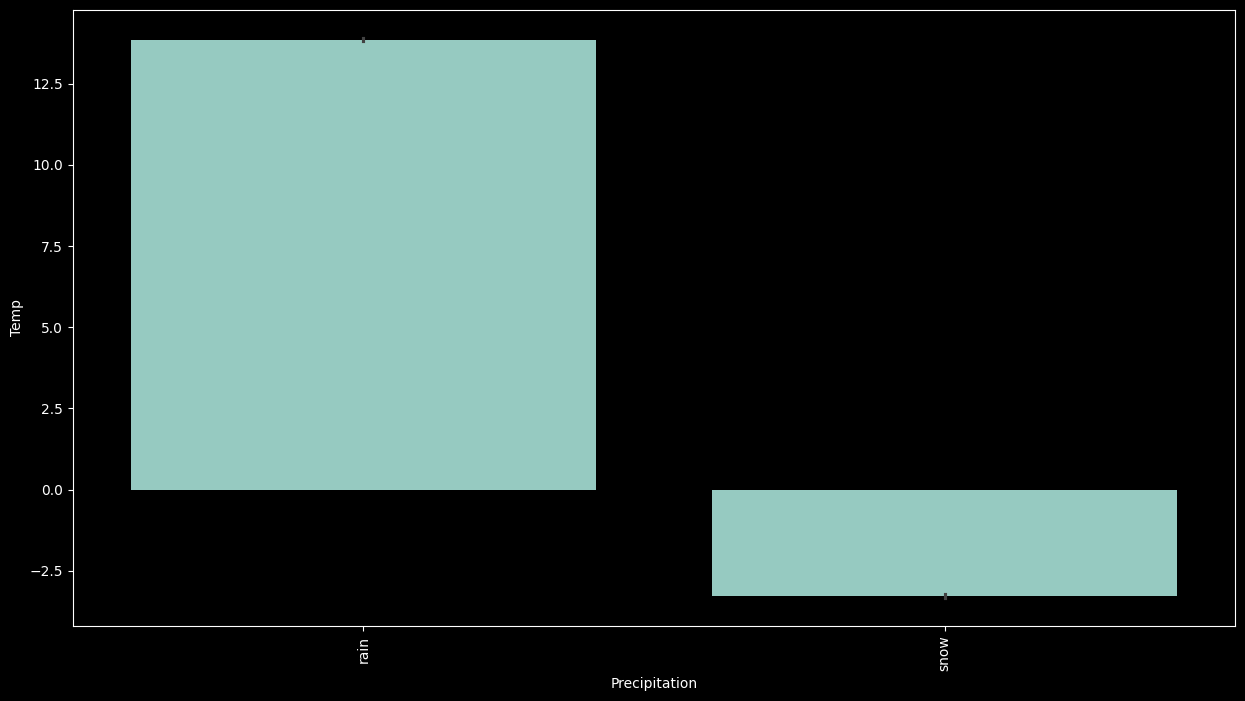

In [ ]:
df1 = df.groupby('Precipitation')['Temp'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x='Precipitation', y='Temp',data=df)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Partly Cloudy'),
  Text(1, 0, 'Mostly Cloudy'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Foggy'),
  Text(4, 0, 'Breezy and Mostly Cloudy'),
  Text(5, 0, 'Clear'),
  Text(6, 0, 'Breezy and Partly Cloudy'),
  Text(7, 0, 'Breezy and Overcast'),
  Text(8, 0, 'Humid and Mostly Cloudy'),
  Text(9, 0, 'Humid and Partly Cloudy'),
  Text(10, 0, 'Windy and Foggy'),
  Text(11, 0, 'Windy and Overcast'),
  Text(12, 0, 'Breezy and Foggy'),
  Text(13, 0, 'Windy and Partly Cloudy'),
  Text(14, 0, 'Breezy'),
  Text(15, 0, 'Dry and Partly Cloudy'),
  Text(16, 0, 'Windy and Mostly Cloudy'),
  Text(17, 0, 'Dangerously Windy and Partly Cloudy'),
  Text(18, 0, 'Dry'),
  Text(19, 0, 'Windy'),
  Text(20, 0, 'Humid and Overcast'),
  Text(21, 0, 'Light Rain'),
  Text(22, 0, 'Drizzle'),
  Text(23, 0, 'Windy and Dry'),
  Text(24, 0, 'Dry and Mostly C

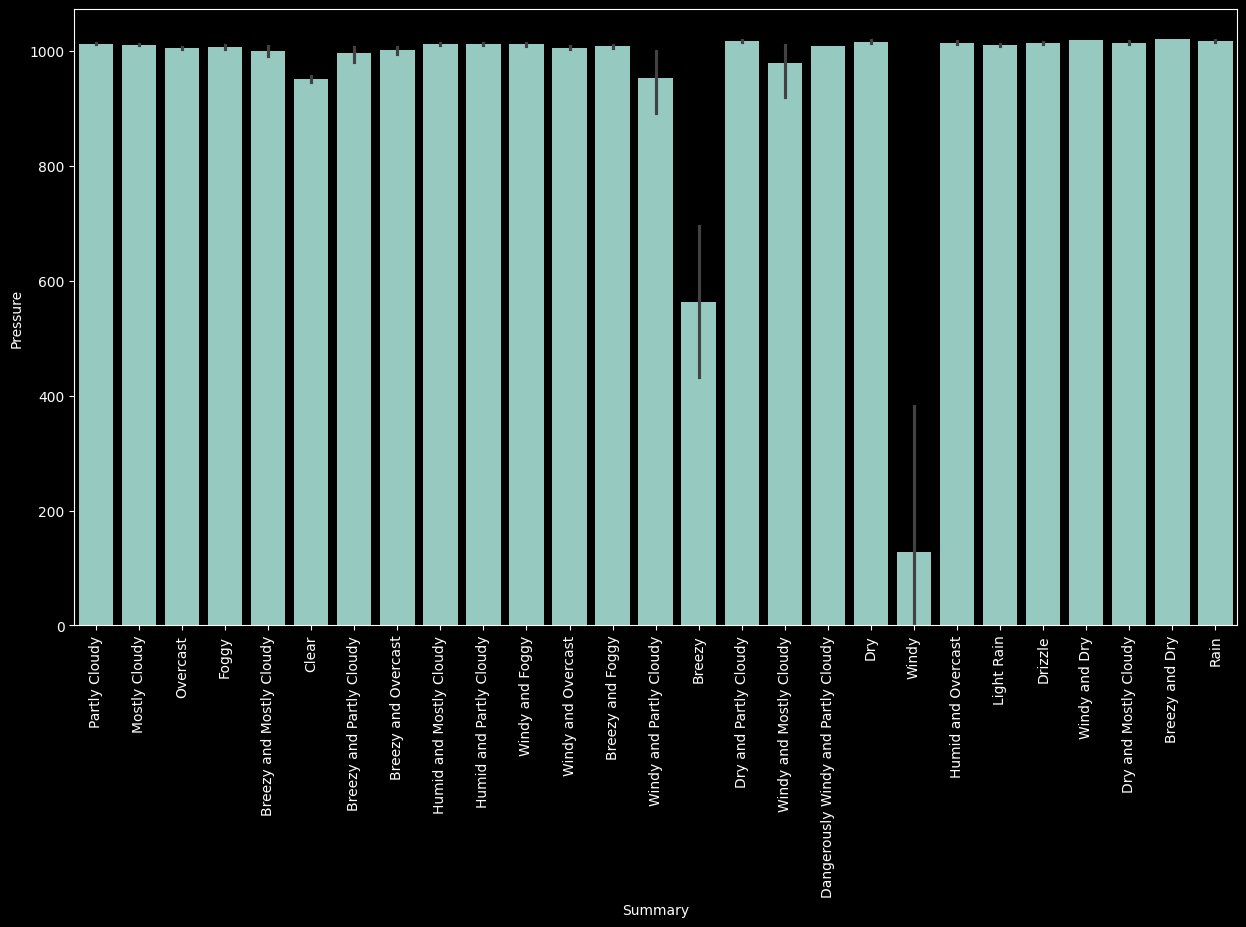

In [ ]:
df2 = df.groupby('Summary')['Pressure'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x='Summary', y='Pressure',data=df)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Partly Cloudy'),
  Text(1, 0, 'Mostly Cloudy'),
  Text(2, 0, 'Overcast'),
  Text(3, 0, 'Foggy'),
  Text(4, 0, 'Breezy and Mostly Cloudy'),
  Text(5, 0, 'Clear'),
  Text(6, 0, 'Breezy and Partly Cloudy'),
  Text(7, 0, 'Breezy and Overcast'),
  Text(8, 0, 'Humid and Mostly Cloudy'),
  Text(9, 0, 'Humid and Partly Cloudy'),
  Text(10, 0, 'Windy and Foggy'),
  Text(11, 0, 'Windy and Overcast'),
  Text(12, 0, 'Breezy and Foggy'),
  Text(13, 0, 'Windy and Partly Cloudy'),
  Text(14, 0, 'Breezy'),
  Text(15, 0, 'Dry and Partly Cloudy'),
  Text(16, 0, 'Windy and Mostly Cloudy'),
  Text(17, 0, 'Dangerously Windy and Partly Cloudy'),
  Text(18, 0, 'Dry'),
  Text(19, 0, 'Windy'),
  Text(20, 0, 'Humid and Overcast'),
  Text(21, 0, 'Light Rain'),
  Text(22, 0, 'Drizzle'),
  Text(23, 0, 'Windy and Dry'),
  Text(24, 0, 'Dry and Mostly C

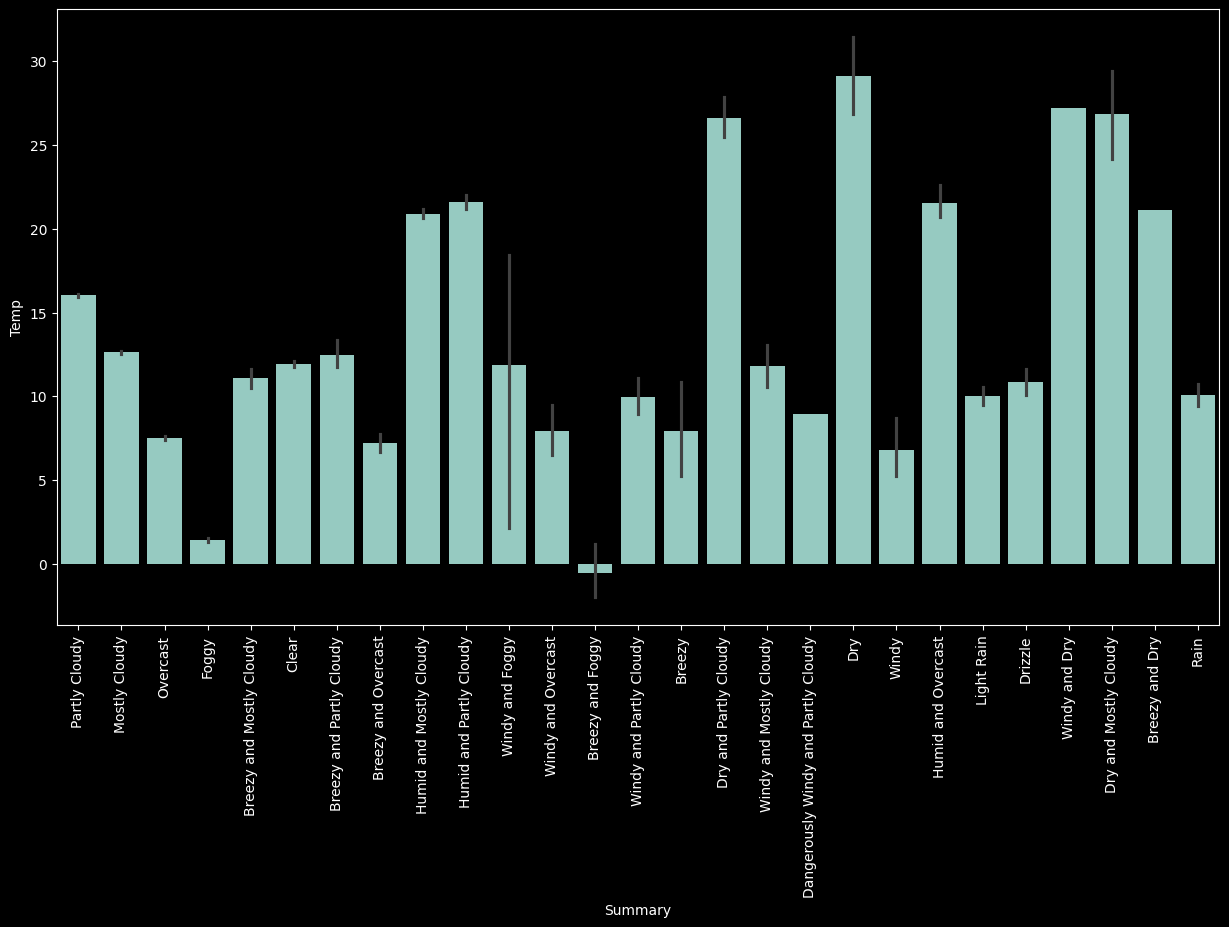

In [ ]:
df3 = df.groupby('Summary')['Temp'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.barplot(x='Summary', y='Temp',data=df)
plt.xticks(rotation = 90)

In [ ]:
df

,Date,Summary,Precipitation,Temp,Feels_Like,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df['Summary'] = le.fit_transform(df['Summary'])
df['Daily_Summary'] = le.fit_transform(df['Daily_Summary'])

df.head()

,Date,Summary,Precipitation,Temp,Feels_Like,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Daily_Summary
0,2159,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,17
1,2160,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,17
2,2161,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17
3,2162,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,17
4,2163,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,17


In [ ]:
Precipitation=df['Precipitation'].value_counts()
Precipitation

,count
Precipitation,
rain,85200
snow,10712


In [ ]:
df['target']=0

In [ ]:
df['target'][df['Precipitation']=='rain']=1;
df['target'][df['Precipitation']=='snow']=0;
y=df['target']
df.drop(['target'],axis=1,inplace=True)
X=df

<ipython-input-171-82513e85cdcf>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['target'][df['Precipitation']=='rain']=1;
<ipython-input-171-82513e85cdcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
df

,Date,Summary,Precipitation,Temp,Feels_Like,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Daily_Summary
0,2159,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,17
1,2160,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,17
2,2161,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17
3,2162,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,17
4,2163,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,17
...,...,...,...,...,...,...,...,...,...,...,...
96448,93711,19,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,15
96449,93712,19,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,15
96450,93713,19,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,15
96451,93714,19,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,15


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=77)
X_test.drop(['Precipitation'], inplace=True, axis=1)
X_train.drop(['Precipitation'], inplace=True, axis=1)

In [ ]:
from sklearn import metrics
XGB = XGBClassifier()

XGB.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)*100
precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy,'%')
print("Precision:",precision,'%')
print("Recall:",recall,'%')
print(y_pred)

Confusion Matrix:
 [[ 3354    41]
 [   42 25492]]
Accuracy: 99.71309067026168 %
Precision: 99.83942349116829 %
Recall: 99.83551343306964 %
[1 1 1 ... 1 0 1]


In [ ]:
from sklearn import metrics

rf =  RandomForestClassifier(n_estimators=150)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)*100
precision=metrics.precision_score(y_test, y_pred)*100
recall=metrics.recall_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy,'%')
print("Precision:",precision,'%')
print("Recall:",recall,'%')
print(y_pred)

Confusion Matrix:
 [[ 3361    34]
 [    2 25532]]
Accuracy: 99.87555739914964 %
Precision: 99.86701087381678 %
Recall: 99.99216730633665 %
[1 1 1 ... 1 0 1]
